In [17]:
# 1905069
import pandas as pd

#### A.1 : Importing the dataset


In [18]:
dataframe = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
# dataframe

#### A.2 : Number of attributes and records

In [19]:
dataframe.shape

(1470, 35)

#### A.3: Statistics of dataset

In [20]:
dataframe.describe()
# dataframe.describe().loc['25%'].loc['DailyRate']

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### A.4: Number of missing values in dataset

In [21]:
dataframe.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### A.5: Number of duplicate values

In [22]:
# dataframe[dataframe.duplicated(keep=False)]
dataframe.duplicated().sum()

np.int64(0)

#### B.1: Replacing missing values with columnwise mean

In [23]:

# numeric_means = dataframe.select_dtypes(include='number').mean()
# dataframe.fillna(numeric_means, inplace=True)
dataframe.fillna(dataframe.mean, inplace=True)
# dataframe.isnull().sum()

#### B.2: Keeping one copy of data among duplicates

In [24]:
dataframe.drop_duplicates(inplace=True)
# dataframe

#### B.3: Dropping rows for missing data in target column

In [25]:
dataframe.dropna(subset=['Attrition'], inplace=True)

#### C: Splitting the data into features and target

In [26]:
features = dataframe.drop('Attrition', axis=1)
target = dataframe['Attrition']
# target

#### D.1: Encode label columns into numeric values

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
target_encoded = pd.get_dummies(target, drop_first=True)
target_encoded = target_encoded.apply(le.fit_transform).rename(columns={'Yes':'Attrition'})
# target_encoded

#### D.2: Encode features columns into numeric values

In [28]:
features_encoded = pd.get_dummies(features, drop_first=True)
features_encoded = features_encoded.apply(le.fit_transform)
# features_encoded

#### E: Scaling the features

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def scaling(scaler, data):
    cont_col = data.columns[data.nunique() > 2]
    data[cont_col] = scaler.fit_transform(data[cont_col])
    return data

features_scaled = scaling(MinMaxScaler(),features_encoded)
# target_encoded


#### F.1-3: Correlation of every column with the target column

In [30]:
correlations = features_scaled.corrwith(target_encoded['Attrition'])
top_20 = correlations.abs().sort_values(ascending=False).head(20).index
correlations[top_20]

/home/mashroor/.local/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/mashroor/.local/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


OverTime_Yes                         0.246118
MonthlyIncome                       -0.196165
MaritalStatus_Single                 0.175419
TotalWorkingYears                   -0.171571
JobLevel                            -0.169105
YearsInCurrentRole                  -0.160545
Age                                 -0.159205
JobRole_Sales Representative         0.157234
YearsWithCurrManager                -0.156199
StockOptionLevel                    -0.137145
YearsAtCompany                      -0.136932
JobInvolvement                      -0.130016
BusinessTravel_Travel_Frequently     0.115143
JobSatisfaction                     -0.103481
EnvironmentSatisfaction             -0.103369
JobRole_Laboratory Technician        0.098290
MaritalStatus_Married               -0.090984
JobRole_Research Director           -0.088870
Department_Research & Development   -0.085293
JobRole_Manager                     -0.083316
dtype: float64

#### F.4: Top 20 columns that have the highest correlation

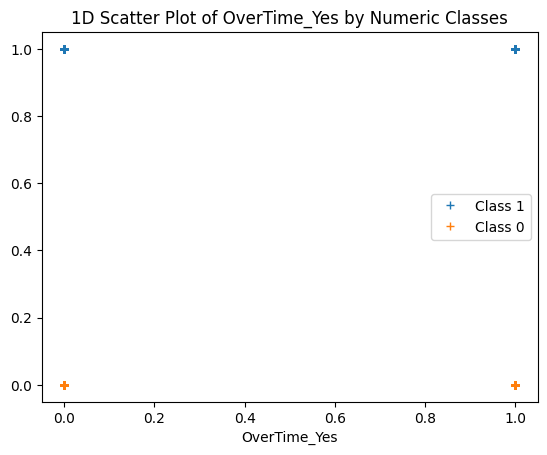

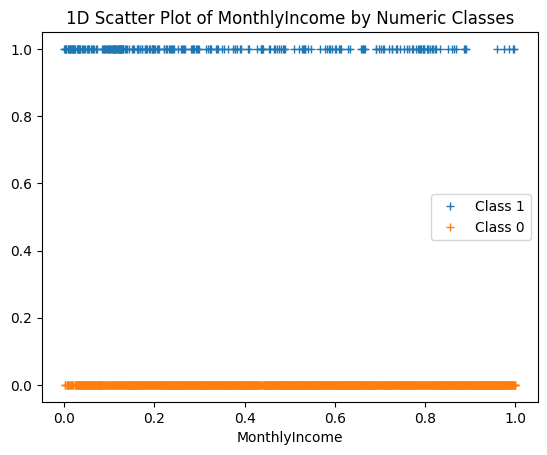

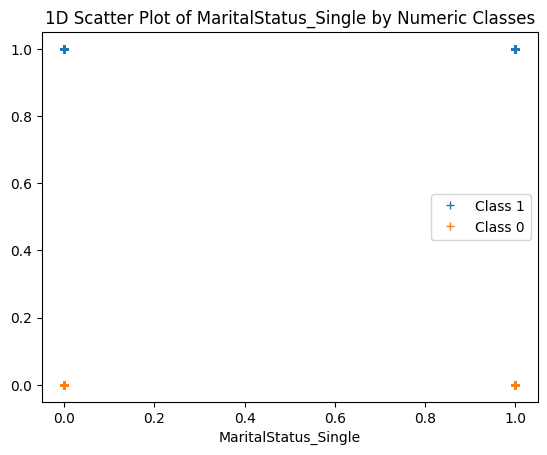

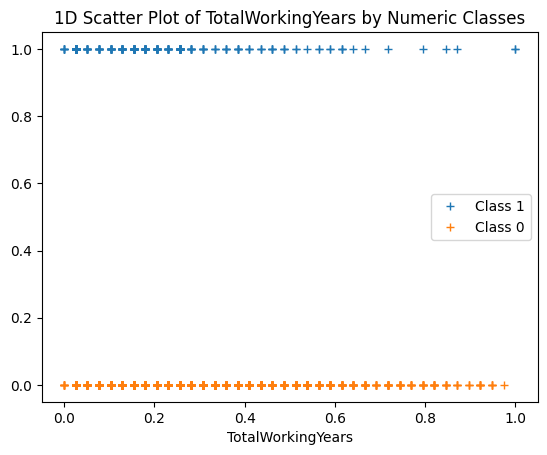

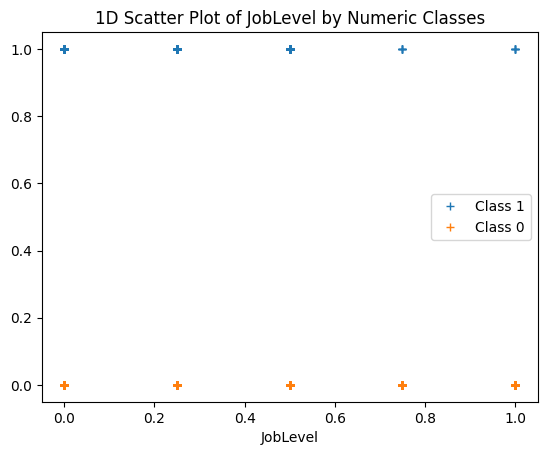

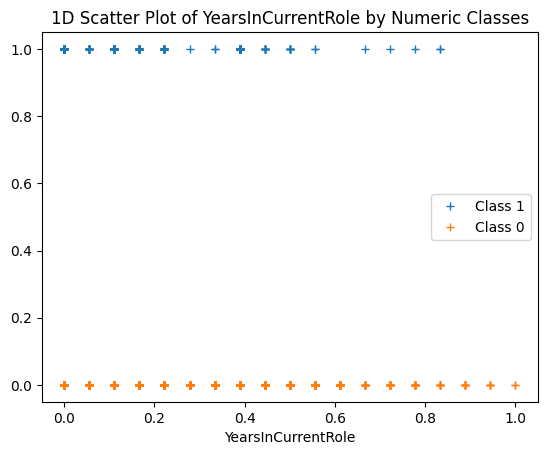

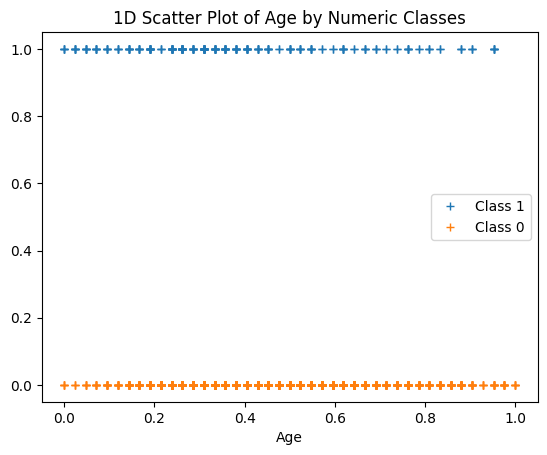

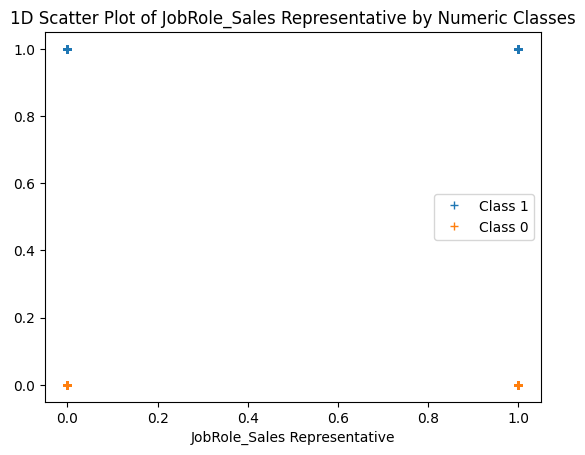

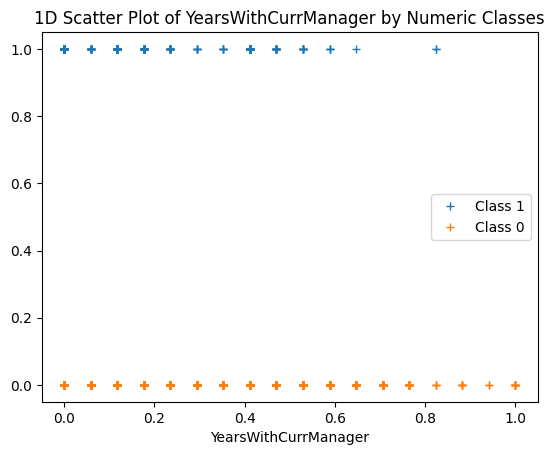

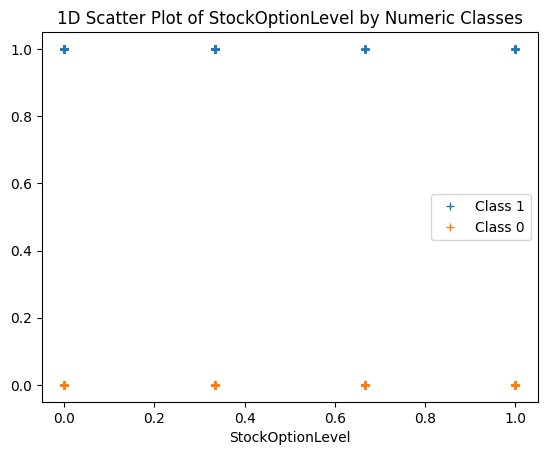

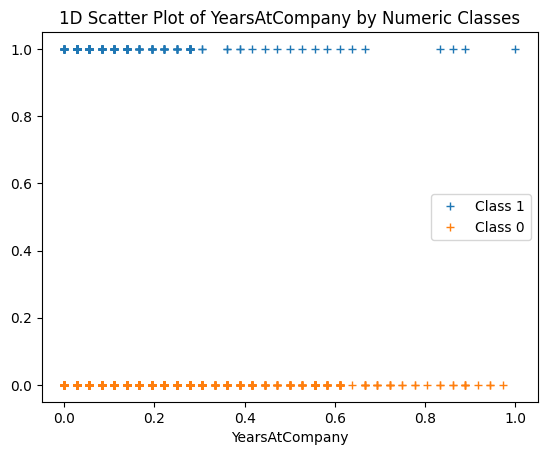

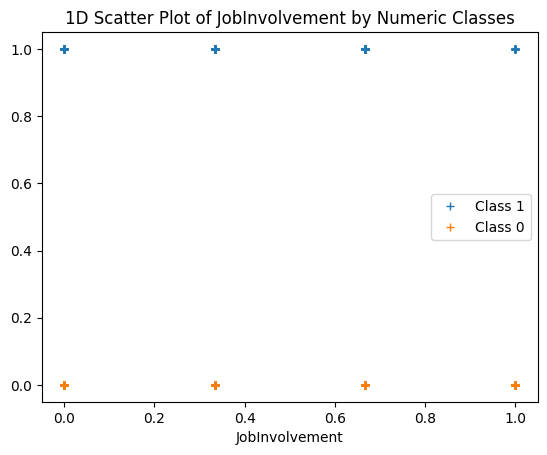

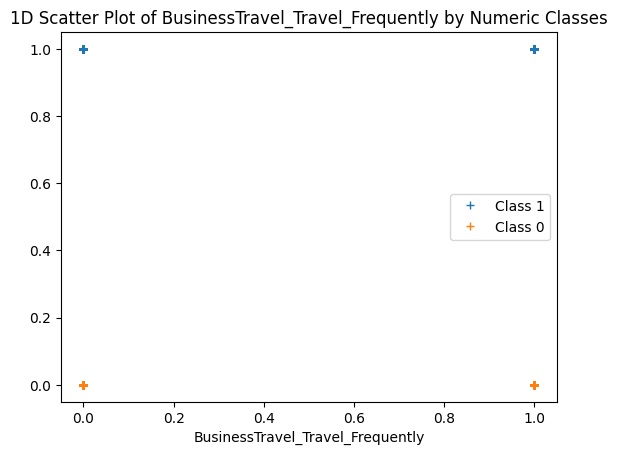

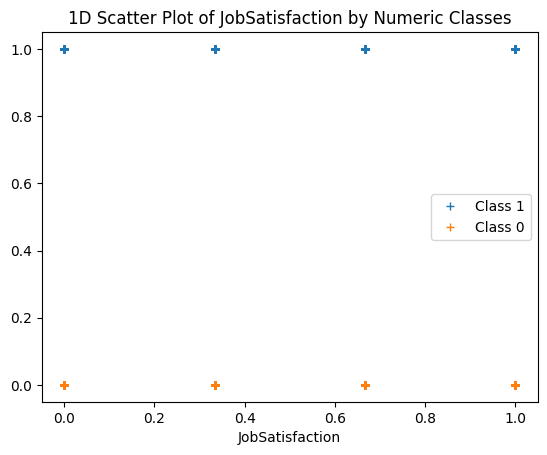

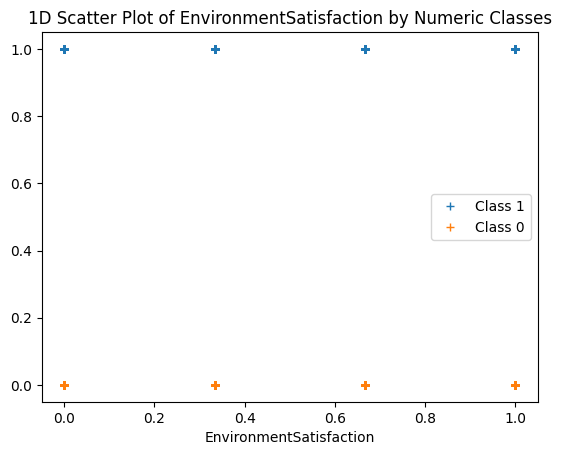

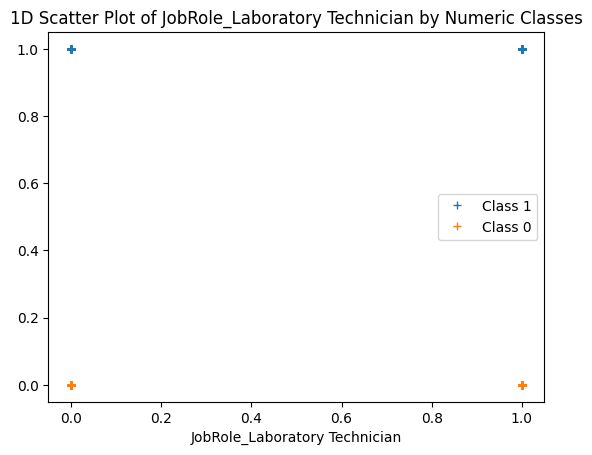

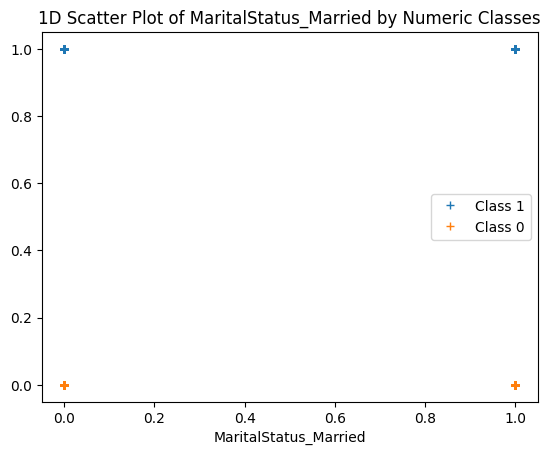

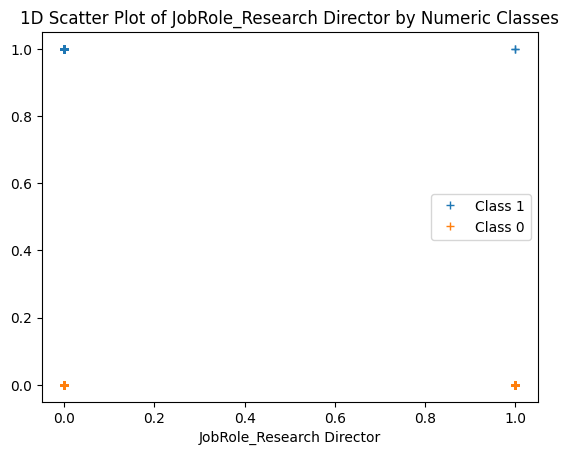

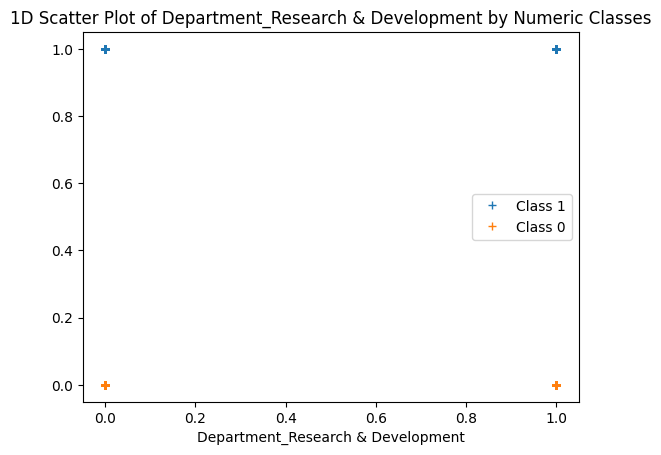

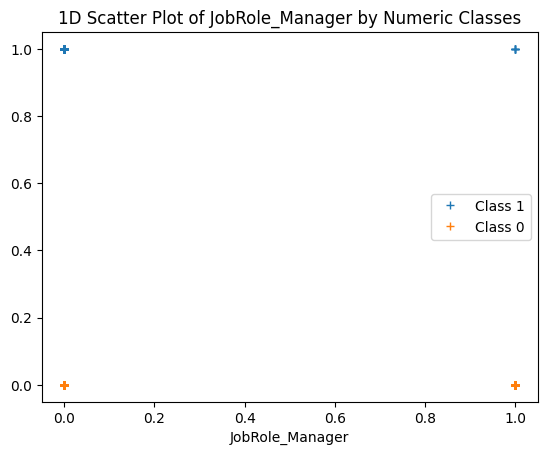

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

classes = target_encoded['Attrition'].unique()

for cols in top_20:
    for label in classes:
        class_ = features_scaled.loc[target_encoded['Attrition']==label]
        plt.plot(class_[cols], np.ones_like(class_[cols])*label, '+', label=f"Class {label}")
    plt.legend()
    plt.xlabel(cols)
    plt.title(f"1D Scatter Plot of {cols} by Numeric Classes")
    plt.show()

#### G: Validating the pipeline

In [32]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = LogisticRegression()

def accuracy_of(data,label,scaler,test_size):
    scaled = scaling(scaler,data)
    x_train, x_test, y_train, y_test = train_test_split(scaled, label, test_size=test_size, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return accuracy_score(y_test, y_pred)

print(f"Accuracy of Logistic Regression classifier: {accuracy_of(features_encoded,target_encoded,MinMaxScaler(),0.2):.8f}")

Accuracy of Logistic Regression classifier: 0.89455782


/home/mashroor/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
